# Correções baseadas na análise do histograma
## *Leonardo Sales Araujo*
### *PEMM/COPPE - Universidade Federal do Rio de Janeiro*

### A primeira parte consiste em carregar os módulos necessários

In [2]:
#carrega os módulos necessários ao código
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

### Carrega-se a imagem original e coleta os dados de cada cor

In [3]:
#carrega a imagem do subdiretorio "img"
imagem = cv2.imread('img/im_ex_03.jpg')
#o python carrega a imagem em BGR e deve ser convertida para RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

#alternativamente, pode-se carregar a imagem com matplotlib
#imagem = plt.imread('img/im_ex_B_HRI.jpg')

vermelho=imagem[:,:,0]
verde=imagem[:,:,1]
azul=imagem[:,:,2]

### representa a figura e seus canais de cores

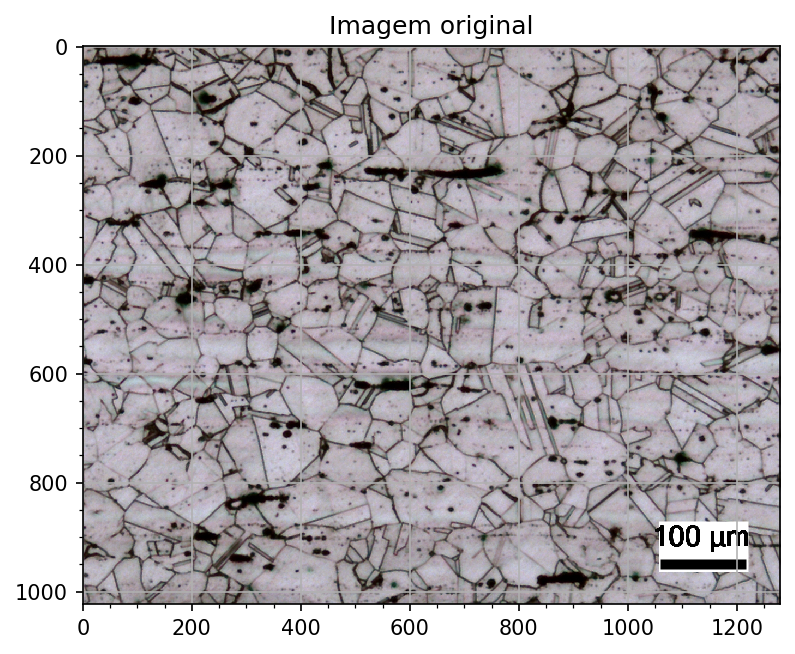

In [4]:
#mostra a figura
plt.figure(1, figsize=(6,6),dpi=150)
plt.title('Imagem original')
plt.imshow(imagem)
#plt.xlim(3600,3800)
#plt.ylim(1800,2000)
plt.minorticks_on()
plt.grid(alpha=0.95,linestyle='-')
plt.show()

### Converte a imagem em tons de cinza e seu histograma

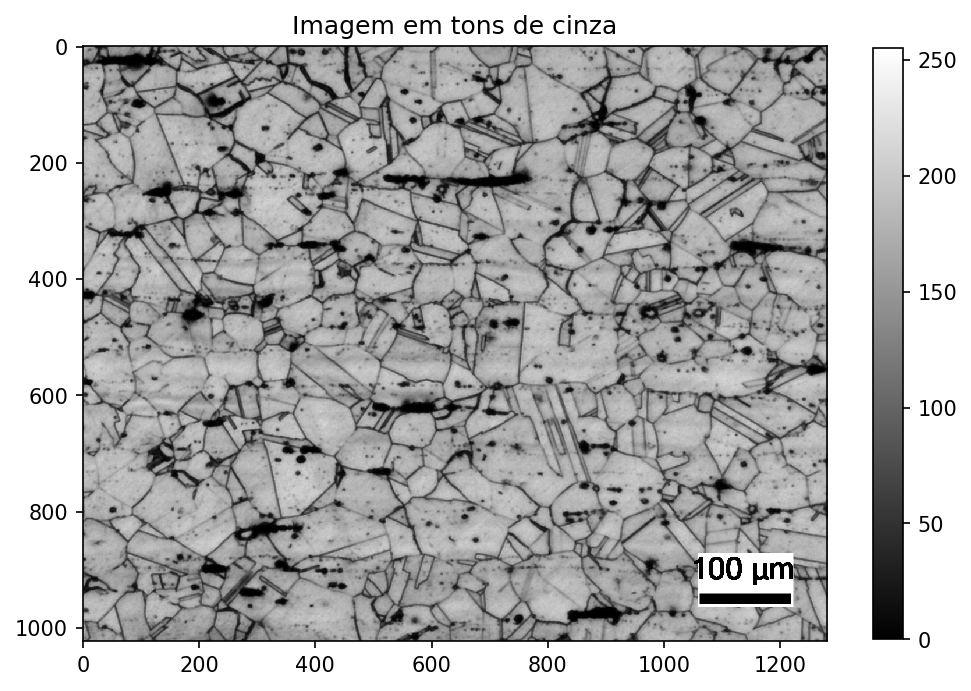

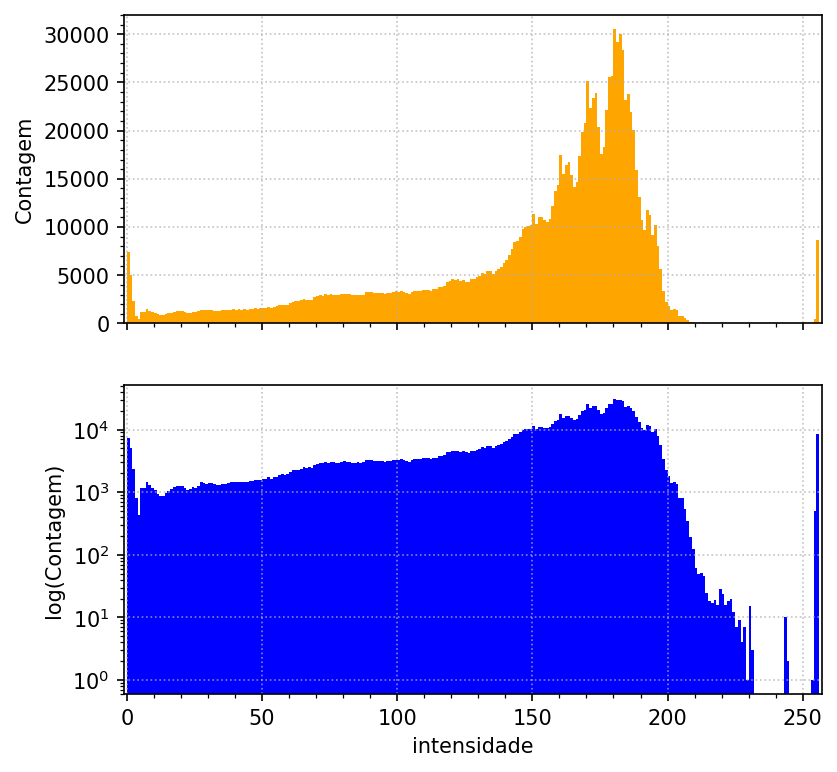

In [5]:
#carrega a imagem já em tons de cinza
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
#mostra a figura
plt.figure(2, figsize=(8,6),dpi=150)
plt.title('Imagem em tons de cinza')
plt.imshow(cinza, cmap='gray',vmin=0, vmax=255)
plt.colorbar(shrink=0.87)
plt.show()

#mostra o histograma normal e log
plt.figure(3, figsize=(6, 6), dpi=150)
#hostograma normal
plt.subplot(211)
plt.hist(cinza.ravel(),256,[0,256],color = 'orange')
plt.xlim(-1, 257)
plt.ylabel('Contagem')
plt.minorticks_on()
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.grid(alpha=0.75,linestyle=':')

#histograma log
plt.subplot(212)
plt.hist(cinza.ravel(),256,[0,256],color = 'blue')
plt.yscale('log')
plt.xlim(-1, 257)
plt.ylabel('log(Contagem)')
plt.xlabel('intensidade')
plt.minorticks_on()
plt.grid(alpha=0.75,linestyle=':')
plt.show()

### Faz a correção baseada no histograma

Na imagem anterior, nota-se um intervalo não utilizado (nos valores de maior intensidade). Nesse sentido, o histograma pode ser "esticado" para preencher essa região e prover maior contraste.

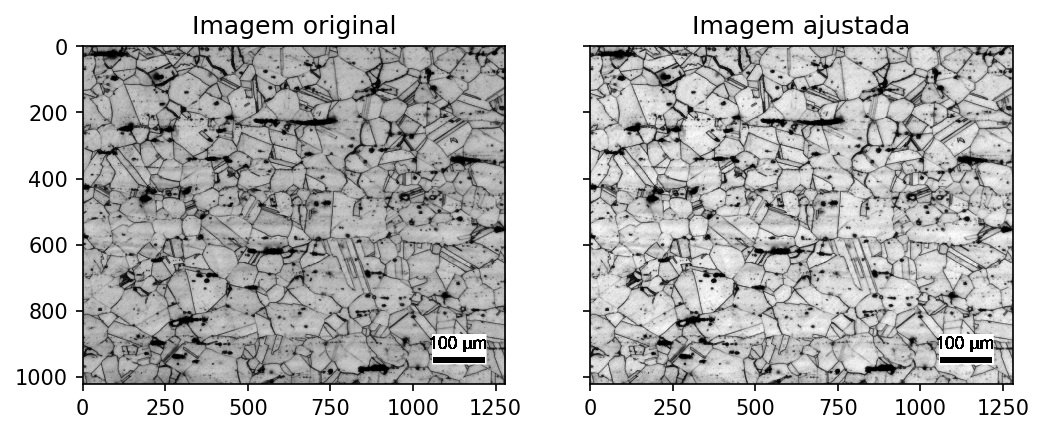

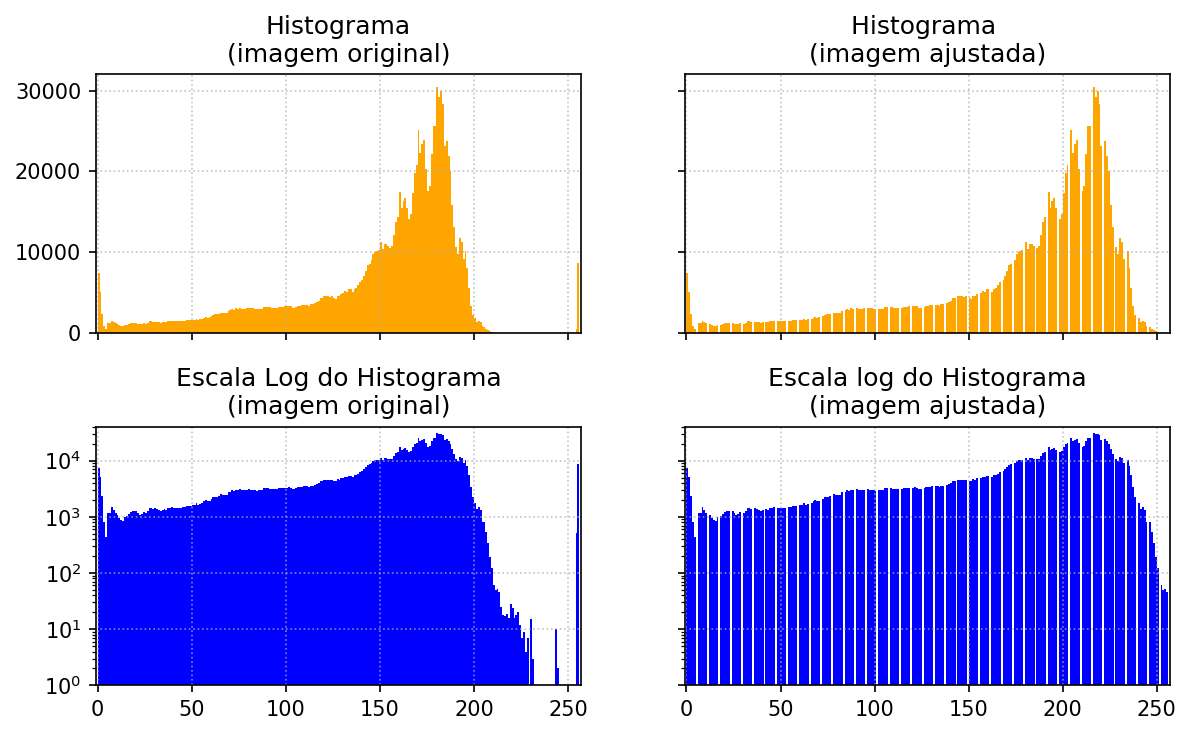

In [31]:
#faz a correção baseada no histograma
corr=(1.2)
nova_img=(corr)*cinza

#plot as imagens
fig,axs=plt.subplots(1,2,figsize=(8, 4), dpi=150)
axs[0].imshow(cinza, cmap='gray',vmin=0, vmax=255)
axs[0].set_title("Imagem original")
axs[1].imshow(nova_img, cmap='gray',vmin=0, vmax=255)
axs[1].set_title("Imagem ajustada")
for ax in axs.flat:
    ax.label_outer()

#plot os histogramas
fig,axs=plt.subplots(2,2,figsize=(8, 5), dpi=150,sharex=True, sharey=False)
axs[0,0].hist(cinza.ravel(),256,[0,256],color = 'orange')
axs[0,0].set_title("Histograma\n(imagem original)")
axs[0,1].hist(nova_img.ravel(),256,[0,256],color = 'orange')
axs[0,1].set_title("Histograma \n(imagem ajustada)")
axs[1,0].hist(cinza.ravel(),256,[0,256],color = 'blue')
axs[1,0].set_title("Escala Log do Histograma\n(imagem original)")
axs[1,0].set_yscale('log')
axs[1,0].set_ylim([1, 4e4])
axs[1,1].hist(nova_img.ravel(),256,[0,256],color = 'blue')
axs[1,1].set_title("Escala log do Histograma\n(imagem ajustada)")
axs[1,1].set_yscale('log')
axs[1,1].set_ylim([1, 4e4])
fig.tight_layout()
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.grid(alpha=0.75,linestyle=':')
    ax.set_xlim([-1, 257])
    
plt.show()


### Faz a correção baseada do Gama ($\gamma$)

A correção de gama é baseada na relação:

$s = Ar^{\gamma}$

onde $r$ é a imagem original, $s$ é a imagem transformada e $A$ e $\gamma$ são constantes. 

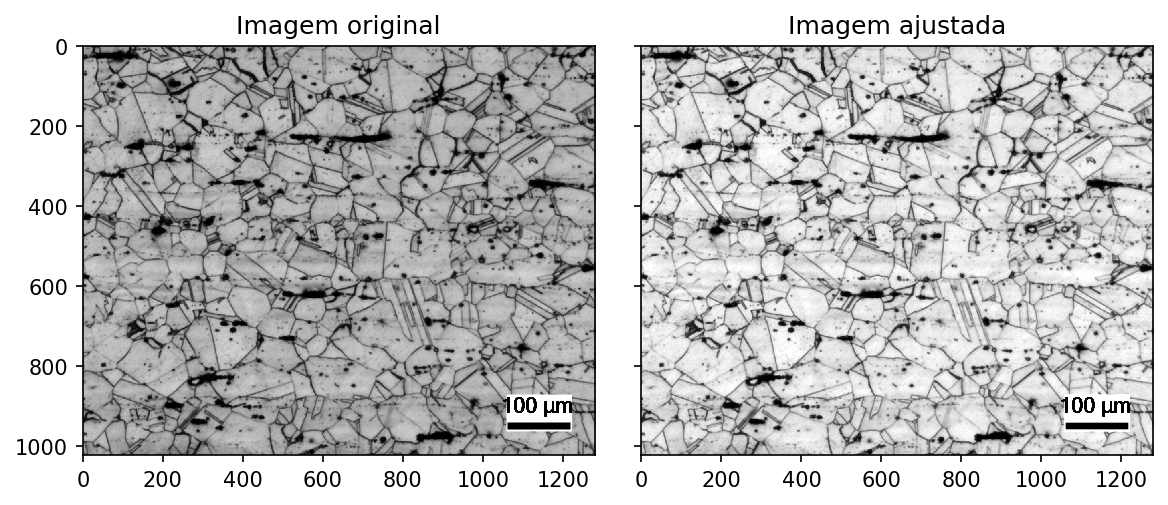

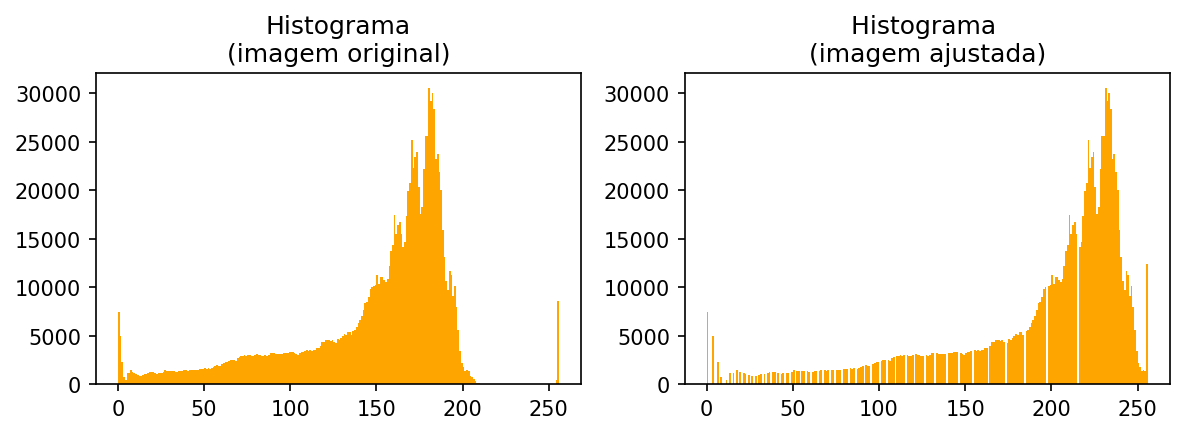

In [80]:
#correção com gama
const_a = 1.2
gama = 0.8
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(const_a*pow(i / 255.0, gama) * 255.0, 0, 255)
im_corr_gama = cv2.LUT(cinza, lookUpTable)

#plota as imagens
fig,axs=plt.subplots(1,2,figsize=(8, 4), dpi=150)
axs[0].imshow(cinza, cmap='gray',vmin=0, vmax=255)
axs[0].set_title("Imagem original")
axs[1].imshow(im_corr_gama, cmap='gray',vmin=0, vmax=255)
axs[1].set_title("Imagem ajustada")
for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()
    
#plotaos histogramas
fig,axs=plt.subplots(1,2,figsize=(8, 3), dpi=150,sharex=False, sharey=False)
axs[0].hist(cinza.ravel(),256,[0,256],color = 'orange')
axs[0].set_title("Histograma\n(imagem original)")
axs[1].hist(im_corr_gama.ravel(),256,[0,256],color = 'orange')
axs[1].set_title("Histograma \n(imagem ajustada)")
fig.tight_layout()

plt.show()